In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 

C:\Users\jackm\.virtualenvs\3d-gradient-1YeJn_Pn\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


(100,)
(100,)


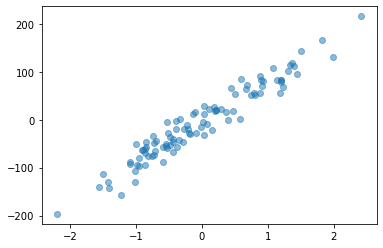

In [43]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
# display(x)
x = x.flatten()
print(x.shape)
print(y.shape)
# display(x)
slope, intercept, _,_,_ = stats.linregress(x,y)
# best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
# grid = np.arange(-3,3,0.1)
# plt.plot(grid,best_fit(grid), '.')
# plt.show()

In [9]:

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


(800,)

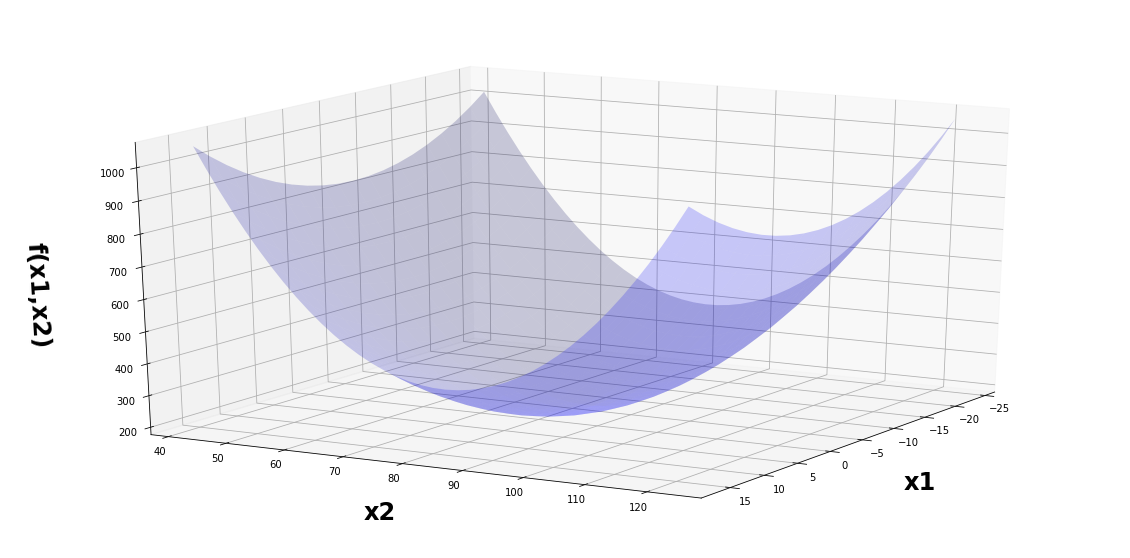

In [38]:

from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
display(zs.shape)
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
# ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
# ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
# ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


# ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
# ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

# fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.show()

In [1]:

import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def costfunction(X,y,theta):
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards

    for i in range(num_iters):
        #Grad function in vectorized form
        h = X @ theta
        theta = theta - alpha * (1/m)* (X.T @ (h-y))

        #Cost and intermediate values for each iteration
        J_history[i] = costfunction(X,y,theta)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist


[[1.         0.        ]
 [1.         0.02564103]
 [1.         0.05128205]
 [1.         0.07692308]
 [1.         0.1025641 ]
 [1.         0.12820513]
 [1.         0.15384615]
 [1.         0.17948718]
 [1.         0.20512821]
 [1.         0.23076923]
 [1.         0.25641026]
 [1.         0.28205128]
 [1.         0.30769231]
 [1.         0.33333333]
 [1.         0.35897436]
 [1.         0.38461538]
 [1.         0.41025641]
 [1.         0.43589744]
 [1.         0.46153846]
 [1.         0.48717949]
 [1.         0.51282051]
 [1.         0.53846154]
 [1.         0.56410256]
 [1.         0.58974359]
 [1.         0.61538462]
 [1.         0.64102564]
 [1.         0.66666667]
 [1.         0.69230769]
 [1.         0.71794872]
 [1.         0.74358974]
 [1.         0.76923077]
 [1.         0.79487179]
 [1.         0.82051282]
 [1.         0.84615385]
 [1.         0.87179487]
 [1.         0.8974359 ]
 [1.         0.92307692]
 [1.         0.94871795]
 [1.         0.97435897]
 [1.         1.        ]]

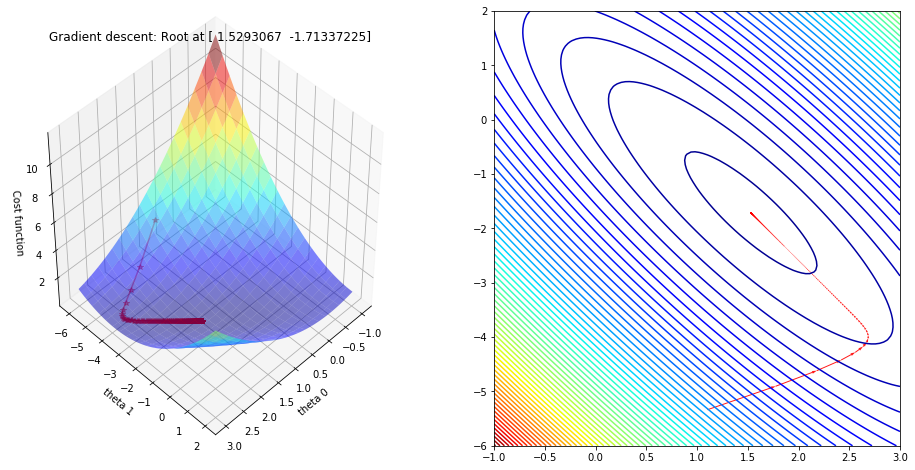

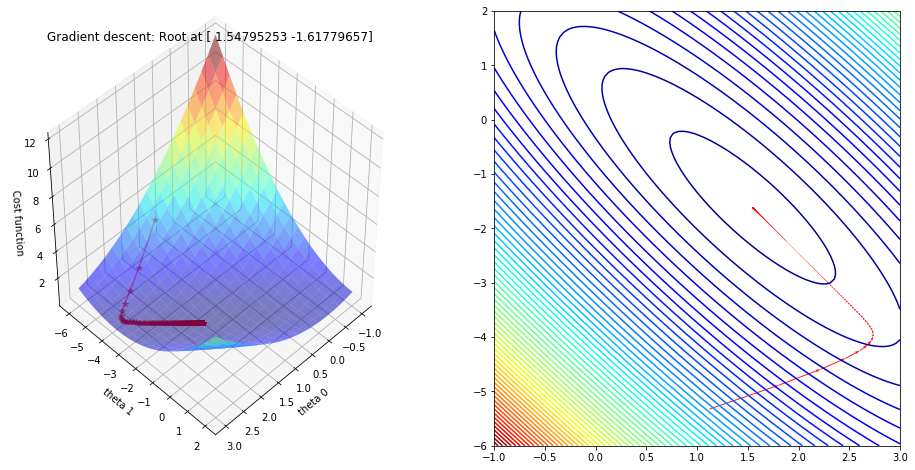

In [3]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
X = np.vstack((np.ones(len(x)),x)).T

print(X)


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
X = np.vstack((np.ones(len(x)),x)).T


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0, theta_1 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()